<h1>Семинарска работа по Вовед во наука на податоците

Tема: Пронаоѓање разни типови корелации меѓу податоци
Автор: Давор Јолески, 203064

5 различни временски серии во кои има податоци за минатите 4 год. Временските серии се од следните берзи и сите се извлечени од Yahoo Finance 3ти август 2023 година.</n>



*   <h7>Bitcoin (BTC)<h7> </n>

*  Grayscale Bitcoin Trust (GBTC)


*   Riot Blockchain Inc. (RIOT)

*   Tesla Inc. (TSLA)



*   Square Inc. (SQ)










<h1>Форматирање на податоците

In [54]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import math

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
btc_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_scinece project/BTC-USD.csv')
gbtc_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_scinece project/GBTC.csv')
riot_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_scinece project/RIOT.csv')
sq_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_scinece project/SQ.csv')
tsla_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_scinece project/TSLA.csv')

In [57]:
btc_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [58]:
btc_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-03,10519.278320,10946.781250,10503.504883,10821.726563,10821.726563,15352685061
1,2019-08-04,10821.632813,11009.207031,10620.278320,10970.184570,10970.184570,16530894787
2,2019-08-05,10960.735352,11895.091797,10960.735352,11805.653320,11805.653320,23875988832
3,2019-08-06,11811.544922,12273.821289,11290.731445,11478.168945,11478.168945,23635107660
4,2019-08-07,11476.193359,12036.990234,11433.701172,11941.968750,11941.968750,22194988641
...,...,...,...,...,...,...,...
1457,2023-07-30,29357.093750,29443.169922,29059.501953,29275.308594,29275.308594,8678454527
1458,2023-07-31,29278.314453,29489.873047,29131.578125,29230.111328,29230.111328,11656781982
1459,2023-08-01,29230.873047,29675.732422,28657.023438,29675.732422,29675.732422,18272392391
1460,2023-08-02,29704.146484,29987.998047,28946.509766,29151.958984,29151.958984,19212655598


In [59]:
btc_df["Date"]  = pd.to_datetime(btc_df["Date"])
gbtc_df["Date"] = pd.to_datetime(gbtc_df["Date"])
riot_df["Date"] = pd.to_datetime(riot_df["Date"])
sq_df["Date"]   = pd.to_datetime(sq_df["Date"])
tsla_df["Date"] = pd.to_datetime(tsla_df["Date"])

In [60]:
# removing columns 'Open', 'High', 'Low', 'Adj Close' and 'Volume' from all dataframes
# only 'Date' and 'Close' are needed

# BTC
btc_df = btc_df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
btc_df.rename(columns = {'Close':'Close_BTC'}, inplace = True)

# GBTC
gbtc_df = gbtc_df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
gbtc_df.rename(columns = {'Close':'Close_GBTC'}, inplace = True)

# RIOT
riot_df = riot_df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
riot_df.rename(columns = {'Close':'Close_RIOT'}, inplace = True)

# SQ
sq_df = sq_df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
sq_df.rename(columns = {'Close':'Close_SQ'}, inplace = True)

# TSLA
tsla_df = tsla_df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
tsla_df.rename(columns = {'Close':'Close_TSLA'}, inplace = True)


In [61]:
# merging all dataframes's Close columns into one dataframe

all_df = pd.merge(btc_df, gbtc_df, on='Date')
all_df = pd.merge(all_df, riot_df, on='Date')
all_df = pd.merge(all_df, sq_df, on='Date')
all_df = pd.merge(all_df, tsla_df, on='Date')
all_df.head()

,Date,Close_BTC,Close_GBTC,Close_RIOT,Close_SQ,Close_TSLA
0,2019-08-05,11805.653320,14.60,2.24,64.849998,15.221333
1,2019-08-06,11478.168945,14.77,2.08,64.599998,15.383333
2,2019-08-07,11941.968750,14.97,2.12,65.000000,15.561333
3,2019-08-08,11966.407227,14.50,2.07,66.269997,15.886667
4,2019-08-09,11862.936523,14.88,2.18,65.010002,15.667333


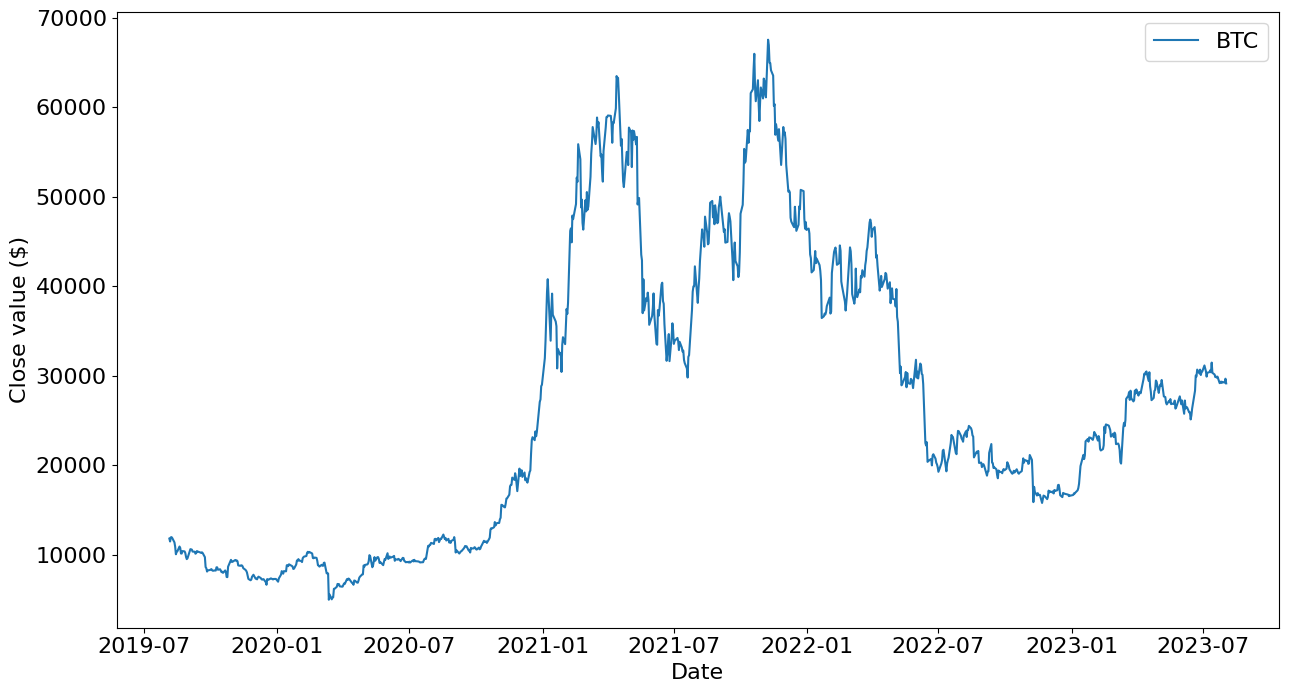

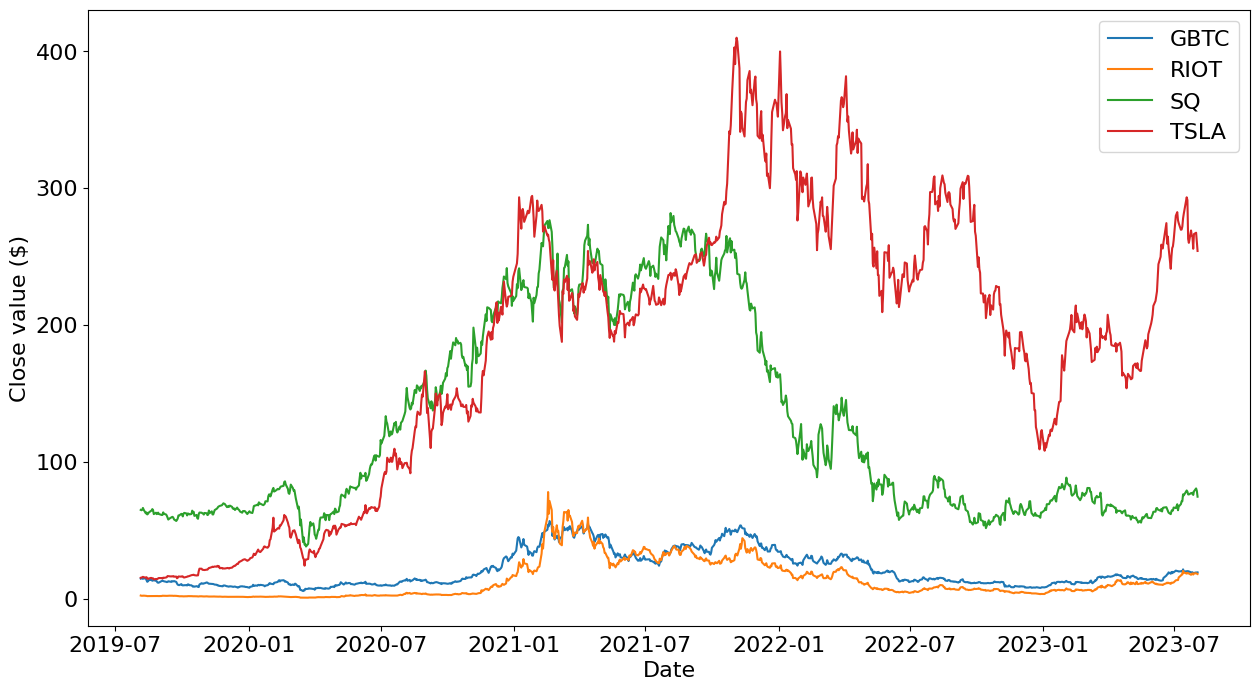

In [62]:

# initial visualizations to know the state of the data

plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(1, figsize = (15, 8))
plt.xlabel("Date")
plt.ylabel("Close value ($)")
plt.plot(all_df["Date"], all_df["Close_BTC"], label='BTC')
plt.legend()
plt.show()


fig, ax = plt.subplots(1, figsize = (15, 8))
plt.xlabel("Date")
plt.ylabel("Close value ($)")
plt.plot(all_df["Date"], all_df["Close_GBTC"], label ='GBTC')
plt.plot(all_df["Date"], all_df["Close_RIOT"], label='RIOT')
plt.plot(all_df["Date"], all_df["Close_SQ"], label='SQ')
plt.plot(all_df["Date"], all_df["Close_TSLA"], label='TSLA')
plt.legend()
plt.show()

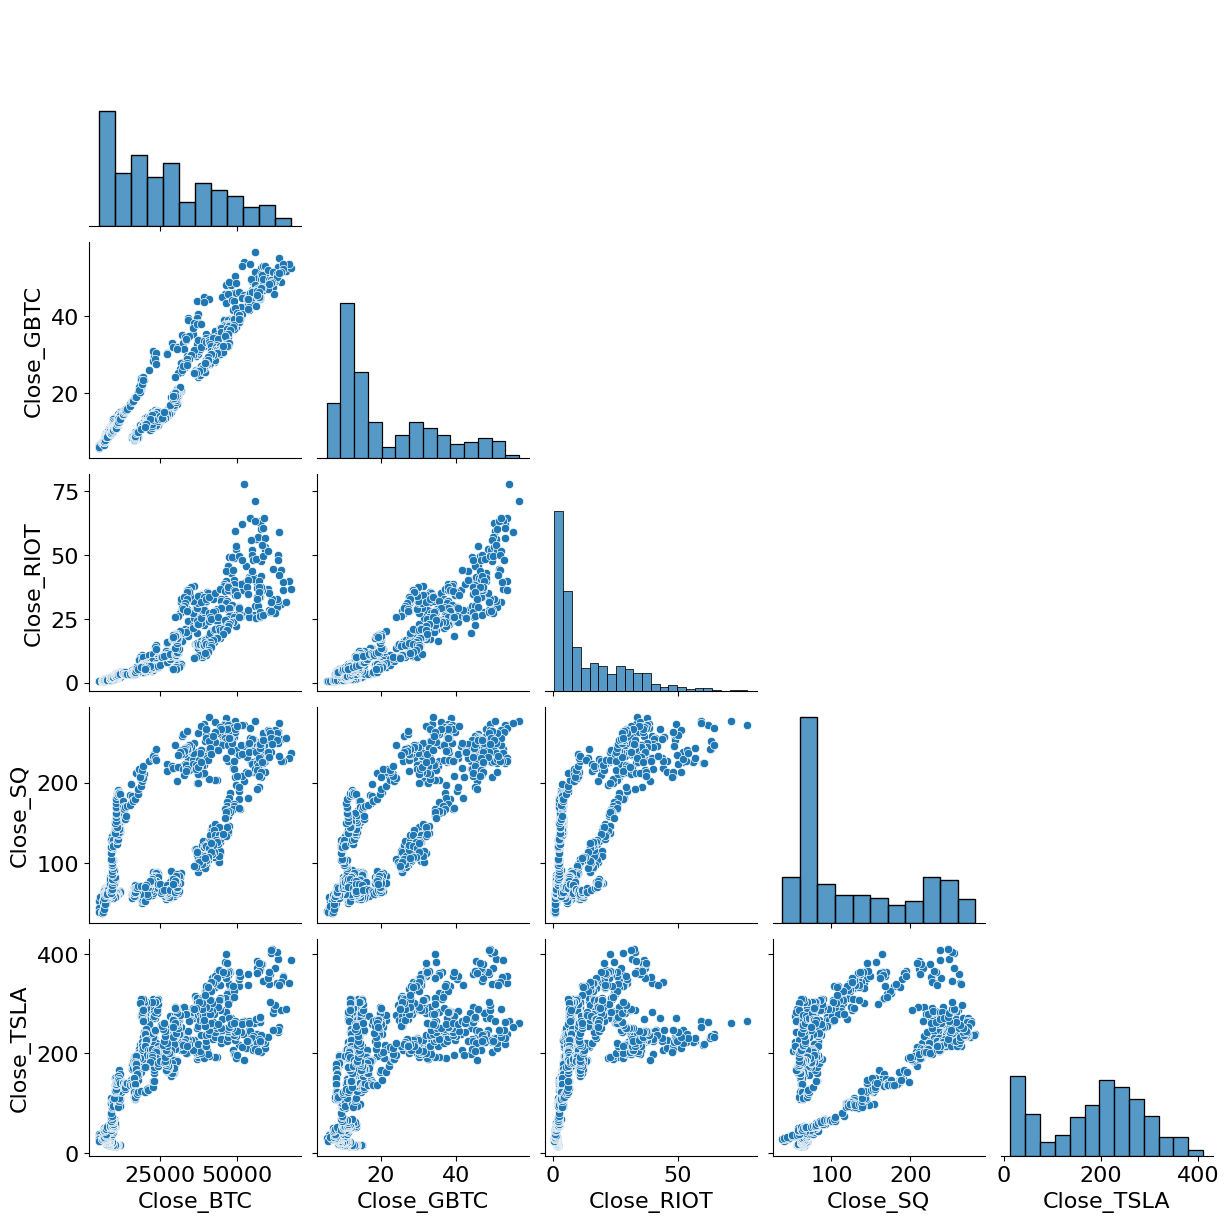

In [63]:
sns.pairplot(all_df, corner=True)


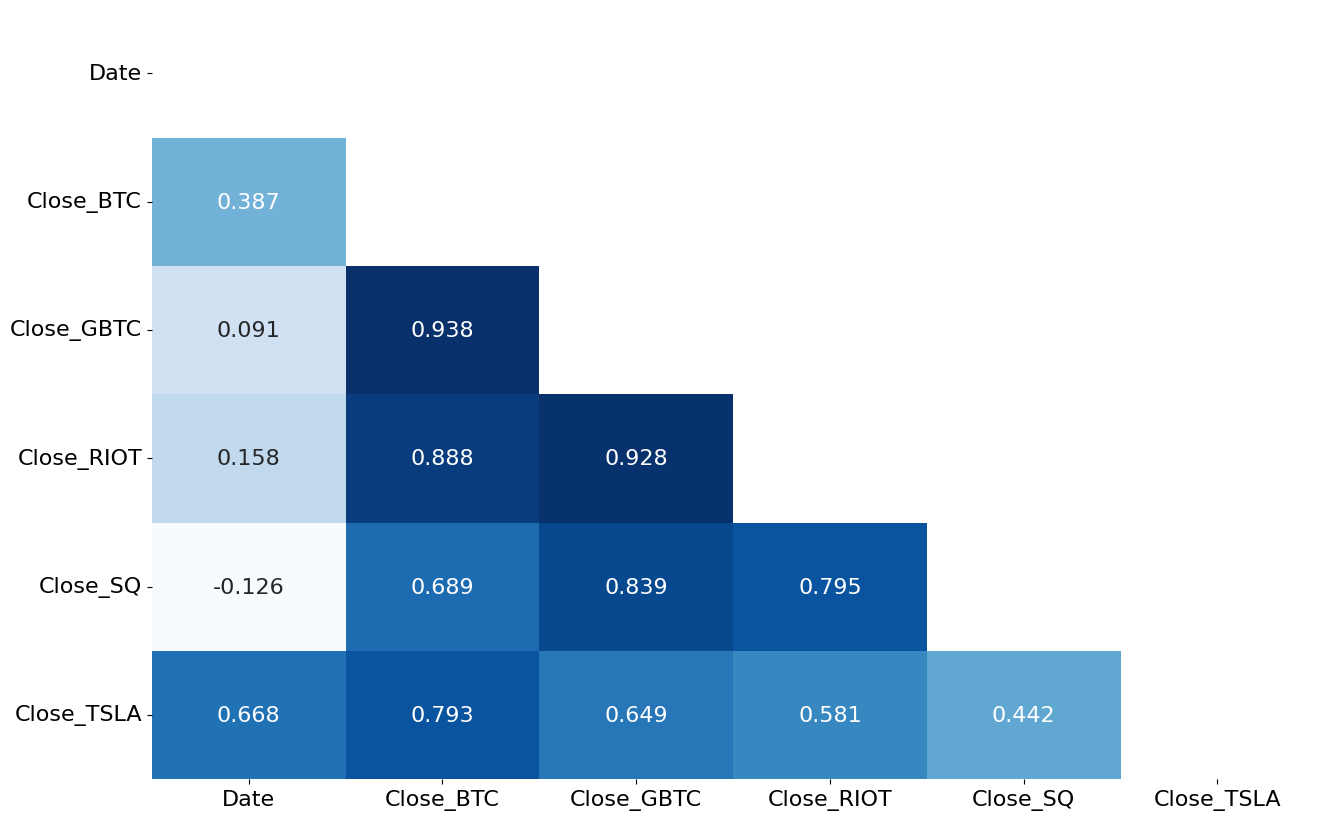

In [64]:
plt.figure(figsize=(15,10))
mask = np.triu(np.ones_like(all_df.corr(), dtype=bool))
sns.heatmap(all_df.corr(), mask=mask, annot=True, cmap="Blues", fmt='.3f', cbar=False)
plt.show()

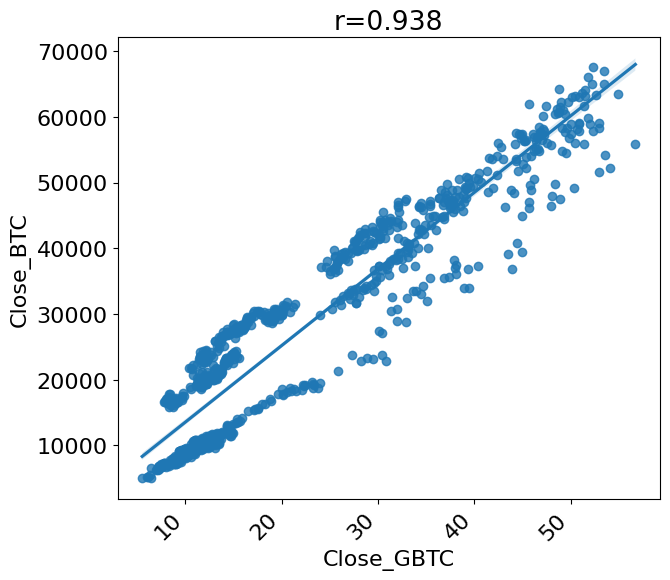

In [65]:
plt.figure(figsize=(7,6))
plt.xticks(rotation=45, ha="right")
plt.title("r=" + str(round(np.corrcoef(all_df["Close_GBTC"], all_df["Close_BTC"])[0,1], 3)))
sns.regplot(x=all_df["Close_GBTC"], y=all_df["Close_BTC"])
plt.show()

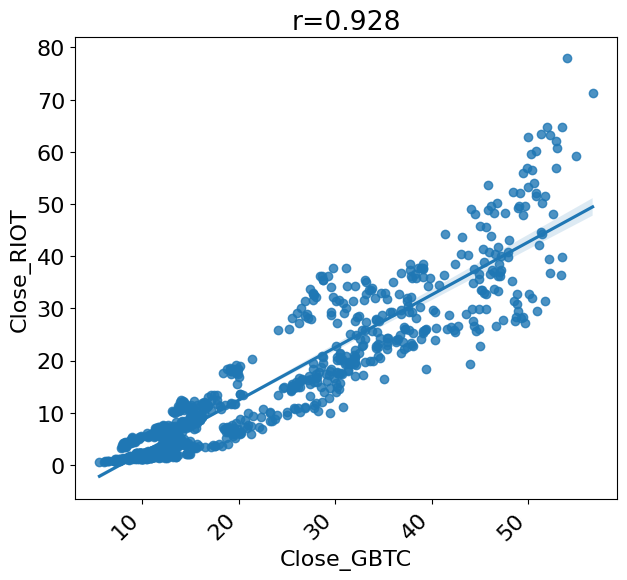

In [66]:
plt.figure(figsize=(7,6))
plt.xticks(rotation=45, ha="right")
plt.title("r=" + str(round(np.corrcoef(all_df["Close_GBTC"], all_df["Close_RIOT"])[0,1], 3)))
sns.regplot(x=all_df["Close_GBTC"], y=all_df["Close_RIOT"])
plt.show()

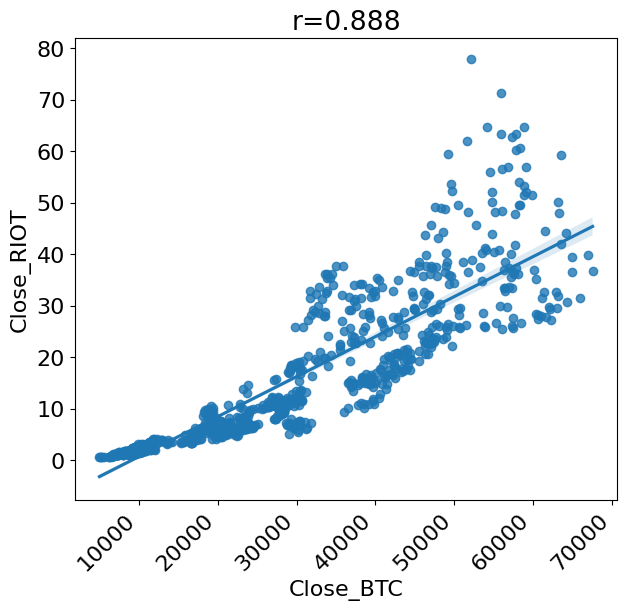

In [67]:
plt.figure(figsize=(7,6))
plt.xticks(rotation=45, ha="right")
plt.title("r=" + str(round(np.corrcoef(all_df["Close_BTC"], all_df["Close_RIOT"])[0,1], 3)))
sns.regplot(x=all_df["Close_BTC"], y=all_df["Close_RIOT"])
plt.show()

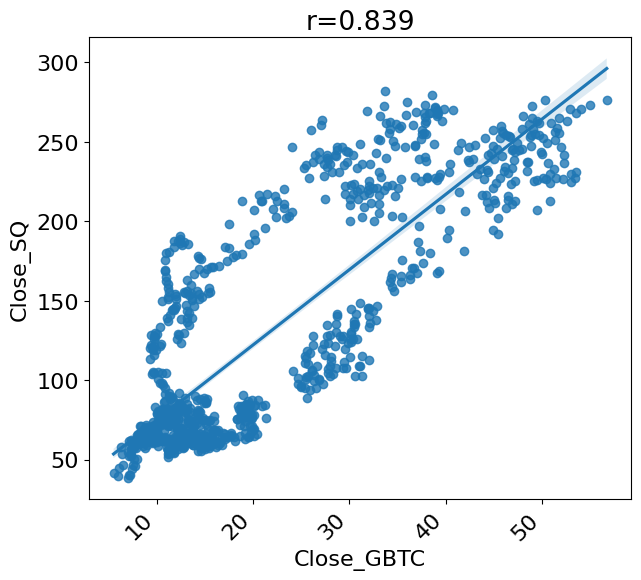

In [68]:
plt.figure(figsize=(7,6))
plt.xticks(rotation=45, ha="right")
plt.title("r=" + str(round(np.corrcoef(all_df["Close_GBTC"], all_df["Close_SQ"])[0,1], 3)))
sns.regplot(x=all_df["Close_GBTC"], y=all_df["Close_SQ"])
plt.show()

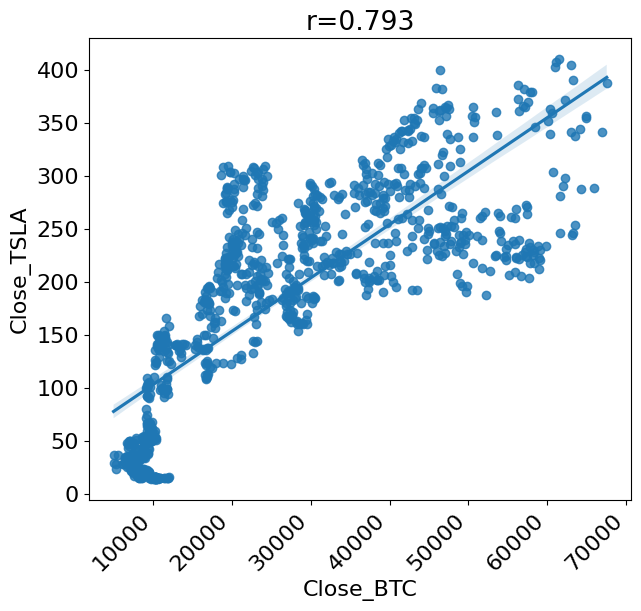

In [69]:
plt.figure(figsize=(7,6))
plt.xticks(rotation=45, ha="right")
plt.title("r=" + str(round(np.corrcoef(all_df["Close_BTC"], all_df["Close_TSLA"])[0,1], 3)))
sns.regplot(x=all_df["Close_BTC"], y=all_df["Close_TSLA"])
plt.show()

<h1>Пронаоѓање на Spearman корелации


```
```



In [70]:
from scipy import stats


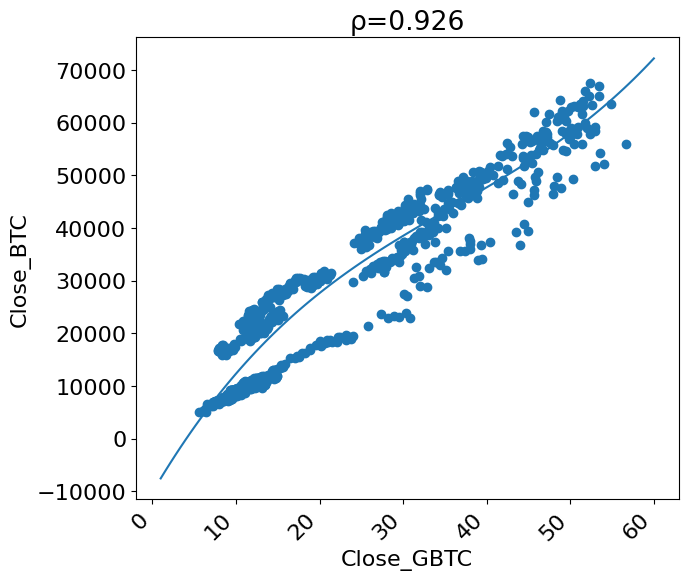

In [71]:

mymodel = np.poly1d(np.polyfit(all_df["Close_GBTC"], all_df["Close_BTC"], 3))
myline = np.linspace(1, 60, 100)

plt.figure(figsize=(7,6))
plt.title( "ρ=" + str(round(stats.spearmanr(all_df["Close_GBTC"], all_df["Close_BTC"]).statistic, 3)) )
plt.xlabel("Close_GBTC")
plt.ylabel("Close_BTC")
plt.xticks(rotation=45, ha="right")
plt.plot(myline, mymodel(myline))
plt.scatter(all_df["Close_GBTC"], all_df["Close_BTC"])
plt.show()

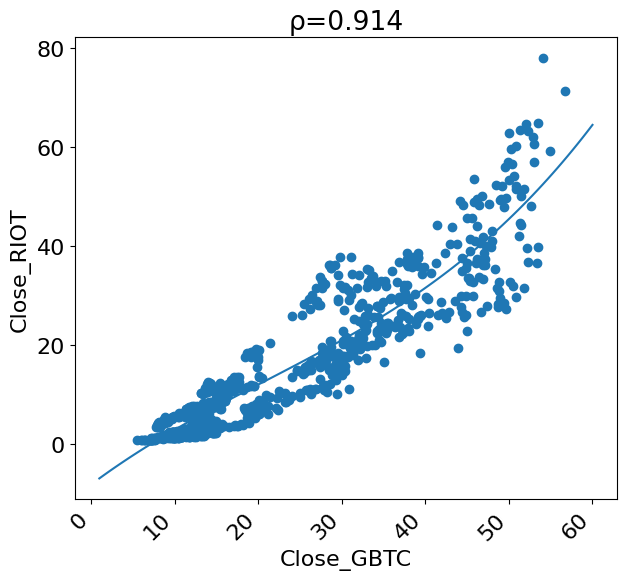

In [72]:

mymodel = np.poly1d(np.polyfit(all_df["Close_GBTC"], all_df["Close_RIOT"], 3))
myline = np.linspace(1, 60, 100)

plt.figure(figsize=(7,6))
plt.title( "ρ=" + str(round(stats.spearmanr(all_df["Close_GBTC"], all_df["Close_RIOT"]).statistic, 3)) )
plt.xlabel("Close_GBTC")
plt.ylabel("Close_RIOT")
plt.xticks(rotation=45, ha="right")
plt.plot(myline, mymodel(myline))
plt.scatter(all_df["Close_GBTC"], all_df["Close_RIOT"])
plt.show()

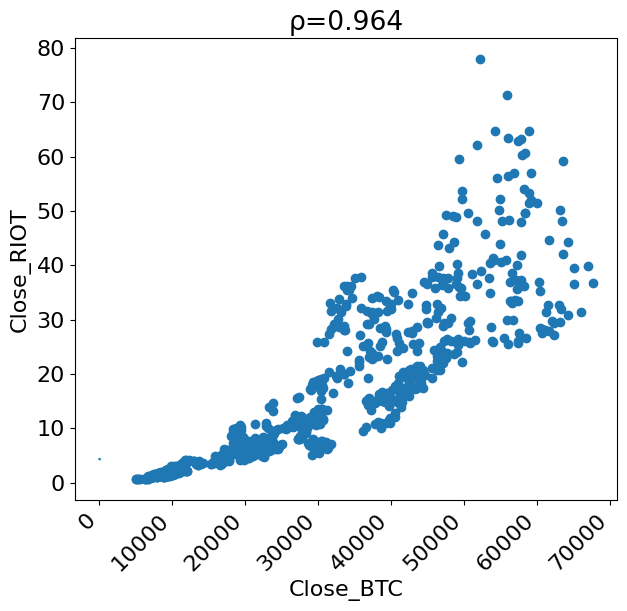

In [73]:

mymodel = np.poly1d(np.polyfit(all_df["Close_BTC"], all_df["Close_RIOT"], 3))
myline = np.linspace(1, 60, 100)

plt.figure(figsize=(7,6))
plt.title( "ρ=" + str(round(stats.spearmanr(all_df["Close_BTC"], all_df["Close_RIOT"]).statistic, 3)) )
plt.xlabel("Close_BTC")
plt.ylabel("Close_RIOT")
plt.xticks(rotation=45, ha="right")
plt.plot(myline, mymodel(myline))
plt.scatter(all_df["Close_BTC"], all_df["Close_RIOT"])
plt.show()

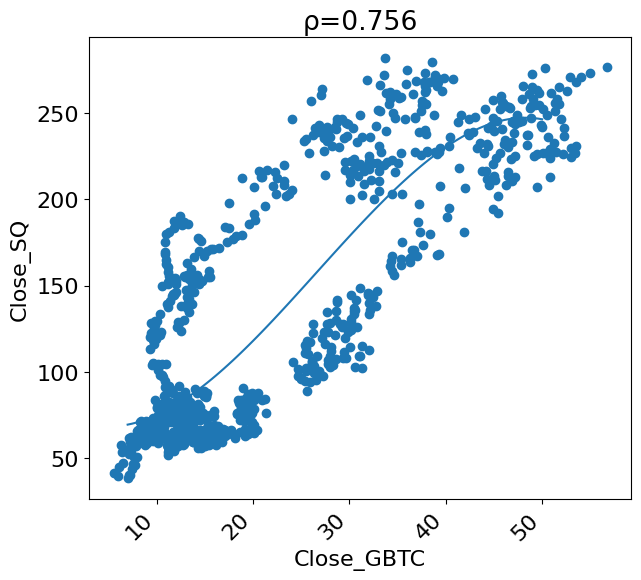

In [74]:

mymodel = np.poly1d(np.polyfit(all_df["Close_GBTC"], all_df["Close_SQ"], 3))
myline = np.linspace(7, 50, 100)

plt.figure(figsize=(7,6))
plt.title( "ρ=" + str(round(stats.spearmanr(all_df["Close_GBTC"], all_df["Close_SQ"]).statistic, 3)) )
plt.xlabel("Close_GBTC")
plt.ylabel("Close_SQ")
plt.xticks(rotation=45, ha="right")
plt.plot(myline, mymodel(myline))
plt.scatter(all_df["Close_GBTC"], all_df["Close_SQ"])
plt.show()

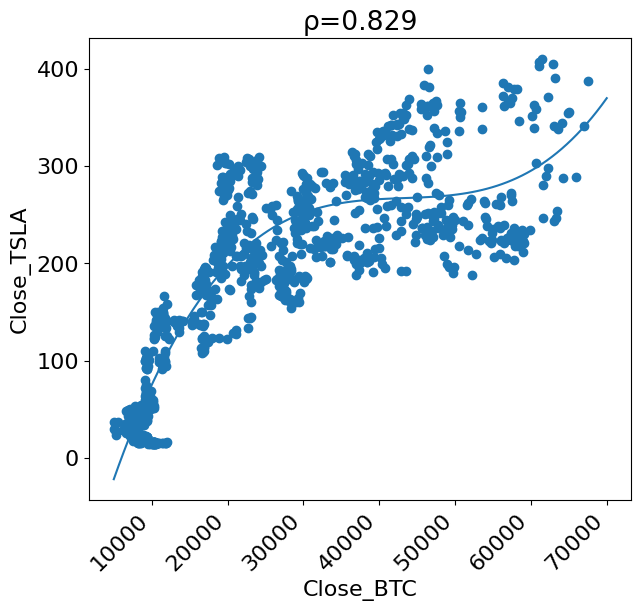

In [75]:

mymodel = np.poly1d(np.polyfit(all_df["Close_BTC"], all_df["Close_TSLA"], 3))
myline = np.linspace(5000, 70000, 100)

plt.figure(figsize=(7,6))
plt.title( "ρ=" + str(round(stats.spearmanr(all_df["Close_BTC"], all_df["Close_TSLA"]).statistic, 3)) )
plt.xlabel("Close_BTC")
plt.ylabel("Close_TSLA")
plt.xticks(rotation=45, ha="right")
plt.plot(myline, mymodel(myline))
plt.scatter(all_df["Close_BTC"], all_df["Close_TSLA"])
plt.show()

<h1>Корелации со rolling window


In [76]:

# sliding window width: 180 days ≈ 6 months

win_corrs = all_df['Close_BTC'].rolling(180).corr(all_df['Close_GBTC'])[179:-1].dropna().reset_index(drop=True)
list = []

for i in range(0, len(win_corrs), 180):
  list.append([all_df["Date"][i], all_df["Date"][i+179], win_corrs[i]])

six_month_corr_table1 = pd.DataFrame(list, columns =['From', 'To', 'Coeficient'])

In [77]:
# sliding window width: 180 days ≈ 6 months

win_corrs = all_df['Close_GBTC'].rolling(180).corr(all_df['Close_RIOT'])[179:-1].dropna().reset_index(drop=True)
list = []

for i in range(0, len(win_corrs), 180):
  list.append([all_df["Date"][i], all_df["Date"][i+179], win_corrs[i]])

six_month_corr_table2 = pd.DataFrame(list, columns =['From', 'To', 'Coeficient'])

In [78]:
# sliding window width: 180 days ≈ 6 months

win_corrs = all_df['Close_BTC'].rolling(180).corr(all_df['Close_RIOT'])[179:-1].dropna().reset_index(drop=True)
list = []

for i in range(0, len(win_corrs), 180):
  list.append([all_df["Date"][i], all_df["Date"][i+179], win_corrs[i]])

six_month_corr_table3 = pd.DataFrame(list, columns =['From', 'To', 'Coeficient'])

In [79]:

# sliding window width: 180 days ≈ 6 months

win_corrs = all_df['Close_GBTC'].rolling(180).corr(all_df['Close_SQ'])[179:-1].dropna().reset_index(drop=True)
list = []

for i in range(0, len(win_corrs), 180):
  list.append([all_df["Date"][i], all_df["Date"][i+179], win_corrs[i]])

six_month_corr_table4 = pd.DataFrame(list, columns =['From', 'To', 'Coeficient'])

In [80]:
# sliding window width: 180 days ≈ 6 months

win_corrs = all_df['Close_BTC'].rolling(180).corr(all_df['Close_TSLA'])[179:-1].dropna().reset_index(drop=True)
list = []

for i in range(0, len(win_corrs), 180):
  list.append([all_df["Date"][i], all_df["Date"][i+179], win_corrs[i]])

six_month_corr_table5 = pd.DataFrame(list, columns =['From', 'To', 'Coeficient'])

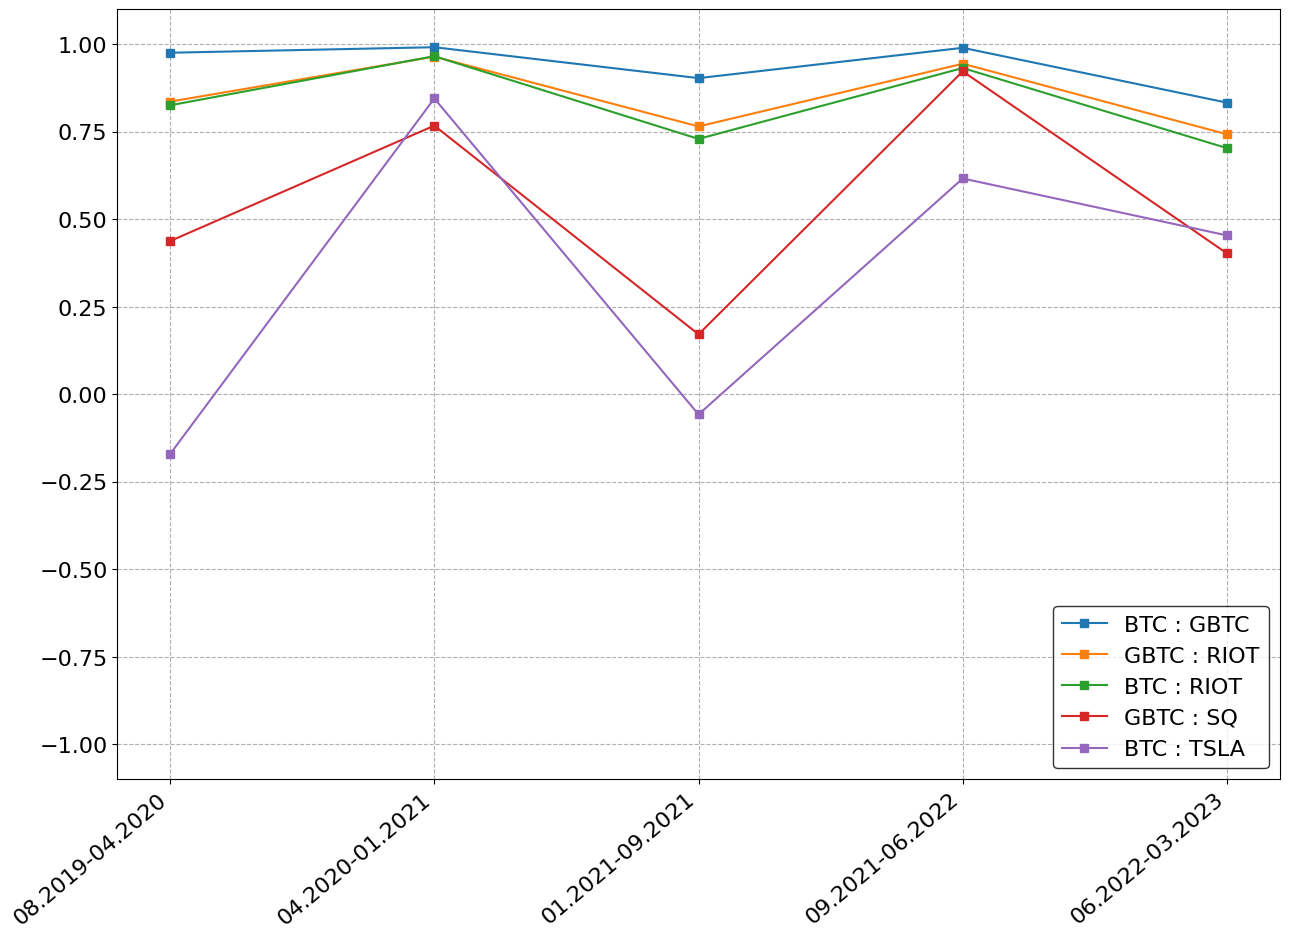

In [81]:
fig, ax = plt.subplots(1, figsize = (15, 10))
xticks = ["08.2019-04.2020", "04.2020-01.2021", "01.2021-09.2021", "09.2021-06.2022", "06.2022-03.2023"]
plt.ylim(-1.1, 1.1)
plt.xticks(rotation=40, ha="right")
plt.grid(True, linestyle = '--')

plt.plot(pd.Series(xticks), six_month_corr_table1["Coeficient"], marker='s', label="BTC : GBTC")
plt.plot(pd.Series(xticks), six_month_corr_table2["Coeficient"], marker='s', label="GBTC : RIOT")
plt.plot(pd.Series(xticks), six_month_corr_table3["Coeficient"], marker='s', label="BTC : RIOT")
plt.plot(pd.Series(xticks), six_month_corr_table4["Coeficient"], marker='s', label="GBTC : SQ")
plt.plot(pd.Series(xticks), six_month_corr_table5["Coeficient"], marker='s', label="BTC : TSLA")

plt.legend(loc='lower right', edgecolor='black')
plt.show()

w=90

In [82]:
# sliding window width: 90 days ≈ 3 months

win_corrs = all_df['Close_BTC'].rolling(90).corr(all_df['Close_GBTC'])[89:-1].dropna().reset_index(drop=True)
list = []

for i in range(0, len(win_corrs), 90):
  list.append([all_df["Date"][i], all_df["Date"][i+89], win_corrs[i]])

three_month_corr_table1 = pd.DataFrame(list, columns =['From', 'To', 'Coeficient'])

In [83]:
# sliding window width: 90 days ≈ 3 months

win_corrs = all_df['Close_GBTC'].rolling(90).corr(all_df['Close_RIOT'])[89:-1].dropna().reset_index(drop=True)
list = []

for i in range(0, len(win_corrs), 90):
  list.append([all_df["Date"][i], all_df["Date"][i+89], win_corrs[i]])

three_month_corr_table2 = pd.DataFrame(list, columns =['From', 'To', 'Coeficient'])


In [84]:
# sliding window width: 90 days ≈ 3 months

win_corrs = all_df['Close_BTC'].rolling(90).corr(all_df['Close_RIOT'])[89:-1].dropna().reset_index(drop=True)
list = []

for i in range(0, len(win_corrs), 90):
  list.append([all_df["Date"][i], all_df["Date"][i+89], win_corrs[i]])

three_month_corr_table3 = pd.DataFrame(list, columns =['From', 'To', 'Coeficient'])


In [85]:
# sliding window width: 90 days ≈ 3 months

win_corrs = all_df['Close_GBTC'].rolling(90).corr(all_df['Close_SQ'])[89:-1].dropna().reset_index(drop=True)
list = []

for i in range(0, len(win_corrs), 90):
  list.append([all_df["Date"][i], all_df["Date"][i+89], win_corrs[i]])

three_month_corr_table4 = pd.DataFrame(list, columns =['From', 'To', 'Coeficient'])

In [86]:
# sliding window width: 90 days ≈ 3 months

win_corrs = all_df['Close_BTC'].rolling(90).corr(all_df['Close_TSLA'])[89:-1].dropna().reset_index(drop=True)
list = []

for i in range(0, len(win_corrs), 90):
  list.append([all_df["Date"][i], all_df["Date"][i+89], win_corrs[i]])

three_month_corr_table5 = pd.DataFrame(list, columns =['From', 'To', 'Coeficient'])

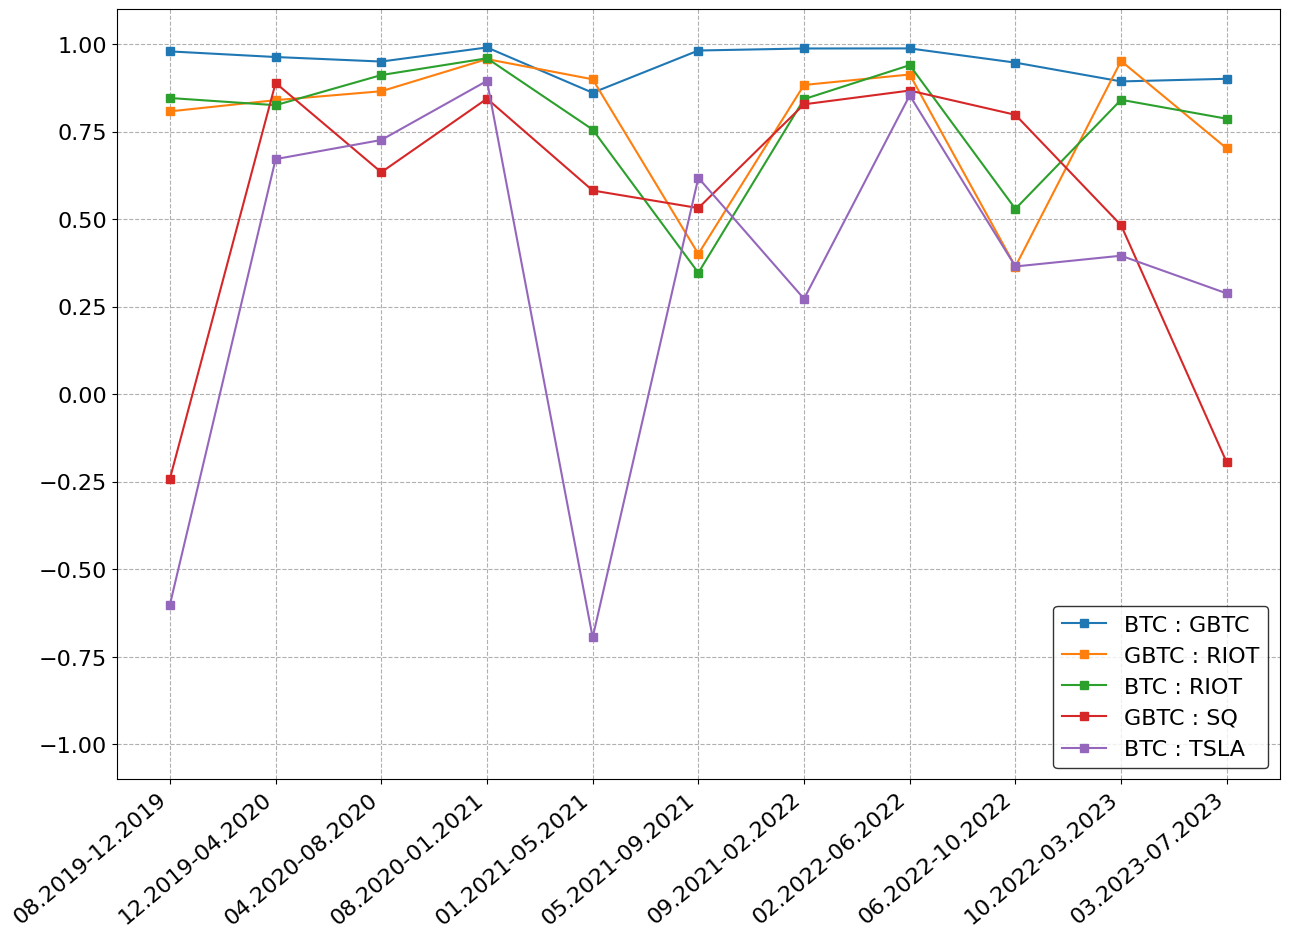

In [87]:
xticks = ["08.2019-12.2019", "12.2019-04.2020", "04.2020-08.2020", "08.2020-01.2021", "01.2021-05.2021", "05.2021-09.2021", "09.2021-02.2022", "02.2022-06.2022", "06.2022-10.2022", "10.2022-03.2023", "03.2023-07.2023"]

fig, ax = plt.subplots(1, figsize = (15, 10))

plt.ylim(-1.1, 1.1)
plt.xticks(rotation=40, ha="right")
plt.grid(True, linestyle = '--')

plt.plot(pd.Series(xticks), three_month_corr_table1["Coeficient"], marker='s', label="BTC : GBTC")
plt.plot(pd.Series(xticks), three_month_corr_table2["Coeficient"], marker='s', label="GBTC : RIOT")
plt.plot(pd.Series(xticks), three_month_corr_table3["Coeficient"], marker='s', label="BTC : RIOT")
plt.plot(pd.Series(xticks), three_month_corr_table4["Coeficient"], marker='s', label="GBTC : SQ")
plt.plot(pd.Series(xticks), three_month_corr_table5["Coeficient"], marker='s', label="BTC : TSLA")

plt.legend(loc='lower right', edgecolor='black')
plt.show()